## Universal Approximation Theorem - Gradient Descent Optimisation

Here we study the possibility to approximate arbitrary functions $f: [0,1]\rightarrow \mathbb{R}$ by using MLPs with a single hidden layer ($n_1$ hidden units). Since this is a regression problem we use the MSE cost: 

The MSE cost for a neural net with a 1d input $x$, a single hidden layer with $n$ units and a linear output layer is given by

$J_{\rm MSE}(\mathbf{\theta}) = \frac{1}{2m}\sum_{i=1}^m \left(y^{(i)} - (\sum_{k=1}^{n_1} w_{2,k}\sigma(w_{1,k}\cdot x^{(i)} +b_{1,k})+b_2)\right)^2$

where we have used the sigmoid ('logit') function $\sigma$ as activation function.

Finally, we will use mini-batch-gradient descent to minimize MSE cost.

The dataset is given by suitable $x$-values (in the interval $[0,1]$) and associated function values $f(x)$, i.e. $\{(x^{(i)},y^{(i)}\,=\,f(x^{(i)}))\, |\, i=1,\dots,m\}$. The data for the training will be generated on the fly.

Goals:
* Learn how a given function can be represented with a single layer MLP.
* Understand that, in principle, it can be learned from sample data.
* Understand that the optimization based on plain gradient is not always straightforward. 
* Experience that the choice of the hyper-parameters number of hidden units, batchsize, learning rate is tricky. 

## PART I: Calculation of the Formulas

Compute the formulas for gradient descent for this problem, i.e. compute the derivatives w.r.t. parameters $w_{1,k},w_{2,k},b_{1,k},b_2$ and formulate the according update rules.

__YOUR SOLUTION:__

.

.

.


.

.

.

.

.

.


## PART II: Implementation

In this part, you need to implement and train the model:
    
1. Implement the cells below for the functions `predict`, `cost`, `gradient`, `train`.
2. Generate the training data - by assuming a function on the unit interval $[0,1]$. Here, we provide two families of functions:
    * Beta distribution function: $b_{\alpha,\beta}(x)=x^\alpha\cdot(1-x)^\beta$
    * Sine function: $sin_\omega(x)=\sin(2\pi\omega\cdot x)$
You can also add some moderate amount of noise to the data in the form $y = f(x)+\sigma_Y * \epsilon$ where $\epsilon$ are standard normally distributed random numbers.
3. Normalise the data (both $x$- and $y$ values.
4. Train the model and convince yourself that the functional relationship could be learned. Can it be reliably learned? - Try several trainings in a row (starting from different random initial weights).

#### Plot Utility

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_function(x,y):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.show()
    
def plot_compare_function(x,y1,y2, label1='', label2=''):
    plt.plot(x, y1, label=label1)
    plt.xlabel('x')
    plt.plot(x, y2, label=label2)
    if label1 and label2:
        plt.legend()
    plt.show()


### Model

In [2]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [11]:
def predict(X,W1,b1,W2,b2):
    """
    Computes the output for the single hidden layer network (n1 units) with 1d input and 1d output.
    
    Arguments:
    W1 -- weights of the hidden layer with shape (n1,1)
    b1 -- biases of the hidden units with shape (n1,1)
    W2 -- weights of the output layer with shape (1,n1)
    b2 -- bias of the output
    X  -- input data with m samples and shape (1,m)
    
    Returns:
    A2 -- Output from the network of shape (1,m) 
    
    """
    
    ### START YOUR CODE ###  

    z = np.dot(W1,X)+b1
    pre_A2 = sigmoid(z)
    m = X.size
    A2 = (np.dot(W2,pre_A2)+b2).reshape(1,m)  
    
    ### END YOUR CODE ###
    
    return A2

#### TEST - Prediction

In [12]:
W1 = np.array([0.4,0.2,-0.4]).reshape(3,1) # n1 = 3
b1 = np.array([0.1,0.1,0.1]).reshape(3,1)
W2 = np.array([1,2,1]).reshape(1,3)
b2 = -1
X = np.linspace(-1,1,5).reshape((1,5))
Ypred = predict(X,W1,b1,W2,b2)
Yexp = np.array([0.99805844, 1.04946333, 1.09991675, 1.14913132, 1.19690185]).reshape(1,5)
np.testing.assert_array_almost_equal(Ypred,Yexp,decimal=8)

#### Cost

In [13]:
def cost(Y,Ypred):
    """
    Computes the MSE cost for given ground truth Y and predicted Ypred
    Uses the predict function defined above.
    
    Arguments:
    Y -- ground truth output with shape (1,m) 
    Ypred -- predicted output with shape (1,m) 
    
    Returns:
    cost -- the MSE cost divided by 2.
    """
    ### START YOUR CODE ###
    D = Y-Ypred
    m = Y.size
    cost = np.sum(D*D)/(2*m)    
    ### END YOUR CODE ###
    return cost

#### TEST - Cost

In [15]:
W1 = np.array([4,5,6]).reshape(3,1)
W2 = np.array([1,2,3]).reshape(1,3)
b1 = np.array([1,1,1]).reshape(3,1)
b2 = 2
X = np.linspace(-1,1,5).reshape(1,5)
Ypred = predict(X,W1,b1,W2,b2)
Y = 2.0*np.ones(5).reshape(1,5)
c = cost(Y,Ypred)
cexp = 9.01669099
np.testing.assert_almost_equal(c,cexp,decimal=8)

#### Gradient

In [107]:
def gradient(W1,b1,W2,b2,X,Y):
    """
    Computes the gradient of the MSE cost for a single hidden layer network with 1d input and 1d output.
    The parts of the gradient associated with the weights array and bias array for the hidden layer, 
    the weights array and the bias for the output layer are provided as separate numpy arrays of according 
    dimension. 
    
    Arguments:    
    W1 -- weights of hidden layer with shape (n1,1)
    b1  -- biases of hidden layer with shape (n1,1)
    W2 -- weights of output layer with shape (1,n1)
    b2  -- biases of output layer
    X  -- input data with shape (1,m)
    Y  -- labels with shape (1,m)
    
    Returns:
    gradient -- dictionary with the gradients w.r.t. W1, W2, b1, b2 and according keys 
                'dW1' with shape (n1,1)
                'db1' with shape (n1,1)
                'dW2' with shape (1,n1)
                'db2' a scalar
    """
    ### START YOUR CODE ###

    # w1*x+b1 -> z1 -> a1 -> w2*a1+b2 : a2
    #first gd update on ypred : a1
    #second gd update on ypred: a2
    
    z1 = np.dot(W1,X)+b1 #(n1,m)
    a1 = sigmoid(z1)
    a2 = np.dot(W2,a1) + b2 #ypred, (1,m)
    
    m = Y.size
    d = Y - a2.reshape(1,m)
    
    dW1 = -(np.dot(a1*(1-a1)*W2.T*X, d.T)/m).reshape(W1.shape[0],1) 
    db1 = -(np.dot(a1*(1-a1)*W2.T, d.T)/m).reshape(W1.shape[0],1)
    
    dW2 = -(np.dot(a1, d.T)/m).reshape(1,W1.shape[0])
    db2 = -(np.sum(d)/m)
    
    
    ### END YOUR CODE ###
    return {'dW1':dW1, 'dW2':dW2, 'db1':db1, 'db2':db2}

#### TEST - Gradient

In [84]:
W1 = np.array([4,5,6]).reshape(3,1)
W2 = np.array([1,2,3]).reshape(1,3)
b1 = np.array([1,1,1]).reshape(3,1)
b2 = 2
X = np.array([1,2,3,4,5,6,7]).reshape((1,7))
Y = np.array([2,2,2,2,2,2,2]).reshape((1,7))

In [85]:
z1 = np.dot(W1,X)+b1
z1 #(3,7)
a1 = sigmoid(z1)
a1 #(3,7)
a2 = np.mat(W2)*np.mat(a1) + b2
a2
dW1exp = np.array([0.00590214,0.00427602,0.00234663]).reshape(W1.shape)
db1exp = np.array([0.00579241,0.004247,0.00234079]).reshape(b1.shape)
dW2exp = np.array([5.99209251,5.99579451,5.99714226]).reshape(W2.shape)
db2exp = 5.99792323

m = Y.size
d = Y - a2.reshape(1,m)
d #(1,7)

dW1 = (-np.dot(a1*(1-a1)*W2.T*X, d.T)/m).reshape(W1.size,1)
dW1

db1 = -(np.dot(a1*(1-a1)*W2.T, d.T)/m).reshape(W1.size,1)
db1

dW2 = -(np.dot(a1, d.T)/m).reshape(1,W1.size)
dW2

db2 = -(np.sum(d)/m)
db2

db2 = -np.squeeze(np.sum(d)/m)

In [89]:
W1 = np.array([4,5,6]).reshape(3,1)
W2 = np.array([1,2,3]).reshape(1,3)
b1 = np.array([1,1,1]).reshape(3,1)
b2 = 2
X = np.array([1,2,3,4,5,6,7]).reshape((1,7))
Y = np.array([2,2,2,2,2,2,2]).reshape((1,7))
gradJ = gradient(W1,b1,W2,b2,X,Y)
dW1exp = np.array([0.00590214,0.00427602,0.00234663]).reshape(W1.shape)
db1exp = np.array([0.00579241,0.004247,0.00234079]).reshape(b1.shape)
dW2exp = np.array([5.99209251,5.99579451,5.99714226]).reshape(W2.shape)
db2exp = 5.99792323
np.testing.assert_array_almost_equal(gradJ['dW1'],dW1exp,decimal=8)
np.testing.assert_array_almost_equal(gradJ['db1'],db1exp,decimal=8)
np.testing.assert_array_almost_equal(gradJ['dW2'],dW2exp,decimal=8)
np.testing.assert_almost_equal(gradJ['db2'],db2exp,decimal=8)

#### Training Loop

In [72]:
def train(X,Y,n1,nepochs,batchsize=32,learning_rate=0.1):
    """
    Performs the training by using MBGD for a MLP with a single hidden layer (n1 units) and 1d input and output layer.
    
    It starts with initializing the parameters:
    * the weights and the biases for the hidden units : W1,b1 of shape (n1,1) 
    * the weights and the bias for the output layer: W2 of shape (1,n1) and scalar b2 

    Then, it loops over the epochs and per epoch over the mini-batches. The number of batches is determined from the 
    batchsize.
    """
    # initialize weights
    W1 = np.random.uniform(-1,1,n1).reshape(n1,1) / (2*np.sqrt(n1))
    b1 = np.zeros((n1,1), dtype=float)
    W2 = np.random.uniform(-1,1,n1).reshape(1,n1) / (2*np.sqrt(n1))
    b2 = 0.0
    
    m = X.shape[1]
    mb = int(m/batchsize)#minibatch size
    indices = np.arange(m)
    
    # remember the epoch id and cost after each epoch for constructing the learning curve at the end
    costs = [] 
    epochs = []

    # Initial cost value:
    epochs.append(0)
    Ypred = predict(X,W1,b1,W2,b2)
    costs.append(cost(Y,Ypred)) 
    
    # training loop
    for epoch in range(nepochs):
        ### START YOUR CODE ###

        np.random.shuffle(indices)
        for j in range(mb):
            it = indices[j*batchsize:(j+1)*batchsize] #return back to it
            X0 = X[:,it].reshape(1,batchsize) #return back to it
            Y0 = Y[:,it].reshape(1,batchsize) #return back to it

            grad = gradient(W1,b1,W2,b2,X0,Y0)
            W1 = W1 - learning_rate*grad['dW1']
            b1 = b1 - learning_rate*grad['db1']
            W2 = W2 - learning_rate*grad['dW2']
            b2 = b2 - learning_rate*grad['db2'] 
        
        ### END YOUR CODE ###
        
        epochs.append(epoch+1)
        Ypred = predict(X,W1,b1,W2,b2)
        costs.append(cost(Y,Ypred))         
    
    print(costs[-1])    
    params = {'W1':W1, 'W2':W2,'b1':b1,'b2':b2}    
    return params, np.array(epochs), np.array(costs)

### Generate the (Training) Data 

In [63]:
def beta_fct(x,alpha,beta):
    """
    Parameters:
    x - input array
    alpha, beta -- larger values lead to more pronounced peaks
    """
    c = alpha/(alpha+beta)
    norm = c**alpha*(1-c)**beta
    return x**alpha*(1-x)**beta/norm

In [64]:
def sin_fct(x,omega):
    """
    Parameters:
    x -- input array
    omega -- frequency that defines the integer number of cycles within the unit interval
    """
    return np.sin(x*2*np.pi*omega)

In [66]:
def generate_inputs(m, func, random=True, vargs=None, sigmaY=0.0):
    """
    Generates m (x,y=f(x))-samples by either generating random x-values in the unit interval (random=True) or by 
    generating a grid of such values. Then the y values (used as labels below) are created from the function object 
    `func`.
    Parameter needed to define the function `func` can be passed as vargs-dict. 
    """
    if random:
        x = np.random.rand(1,m)
    else:
        x = np.linspace(0,1,m).reshape(1,m)
    y = func(x,**vargs) + sigmaY*np.random.randn(*(1,m))
    return x,y

### Normalize the Input and Output

It turns out that it is important to normalize the input and the output data here.
Remember the mean and stdev computed for the training data so that you can also apply it to the test data!

In [67]:
def normalize(X, mu=None, stdev=None):
    """
    Normalizes the data by using z-normalization. If mu and stdev are NOT specified, mean and stedev are 
    computed from the given samples.   

    Returns:
    X1 -- normalized data (array of the same shape as input)
    mu -- mean
    stdev -- standard deviation
    """
    ### START YOUR CODE ###
    if not mu:
        mu = np.mean(X)
    if not stdev:
        stdev = np.std(X)
    X1 = (X-mu)/stdev
    ### END YOUR CODE ###
    
    return X1,mu,stdev

In [68]:
def inv_normalize(X1, mu, stdev):
    """
    Invert the normalization. This is needed to bring the predicted values back to the original scale.

    Returns:
    X -- unnormalized data (array of the same shape as input X1)
    """
    ### START YOUR CODE ###
    X = X1 * stdev + mu
    ### END YOUR CODE ###
    
    return X

### Perform the Training

Includes generating and normalizing the data and training. Test data can be generated as non-random.<br>
Make sure that you do the test performance on the right scales (of both x-values and y-values)!

In [69]:
mtrain = 1000
func = beta_fct
vargs={'alpha':2.0,'beta':2.0}
#func = sin_fct
#vargs={'omega':1.0}
X,Y = generate_inputs(mtrain,func,vargs=vargs, random=False, sigmaY=0.0)
X1, muX, stdevX = normalize(X)
Y1, muY, stdevY = normalize(Y)

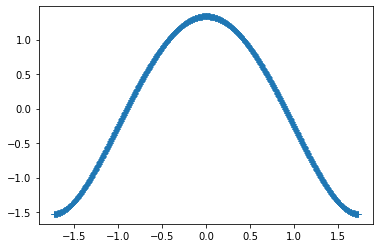

In [70]:
plt.plot(X1[0,:],Y1[0,:],'+')

0.0004874177799339771


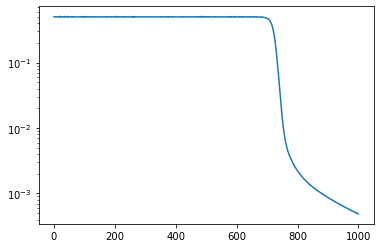

In [108]:
n_hidden = 10
nepochs = 1000 # number of epochs
batchsize = 64
learning_rate = 0.1

params, epochs, costs = train(X1, Y1, n_hidden, nepochs, batchsize=batchsize,learning_rate=learning_rate)
plt.semilogy(epochs,costs)

### Test

Compute the predicted values on the test set and compute the MSE cost.
Prepare a (x,y)-plot with the ground truth test values and the predicted values. 

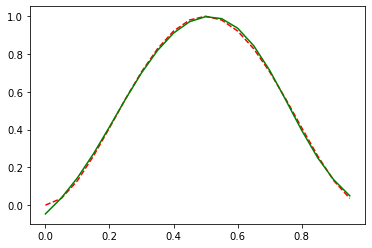

In [109]:
xx = np.arange(0,1,0.05).reshape(1,int(1/0.05))
yy = func(xx, **vargs)
plt.plot(xx[0,:],yy[0,:],'r--')

xx0,_,_ = normalize(xx, muX, stdevX)
yypred0 = predict(xx0, params['W1'],params['b1'],params['W2'],params['b2'])
yypred = inv_normalize(yypred0, muY, stdevY)
plt.plot(xx[0,:],yypred[0,:],'g-')

#plt.plot(X[0,:],Y[0,:],'b.')